# Numpy

В Python есть встроенные:
    1. списки и словари
    2. числовые объекты (целые числа, числа с плавующей точкой)

Numpy это дополнительный модуль для Python для многомерных массивов и эффективных вычислений над числами.
Эта библиотека ближе к hardware (использует типы из C, которые существенно быстрее чем Python типы), за счёт чего более эффективна при вычислениях.

In [26]:
import numpy as np

## Основные типы данных

В Python есть типы: bool, int, float, complex

В numpy имеются эти типы, а также обёртки над этими типами, которые используют реализацию типов на C, например, int8, int16, int32, int64.

Число означает сколько бит используется для хранения числа.

За счёт того, что используются типы данных из C, numpy получает ускорение операций.

In [2]:
type(np.bool)

type

In [3]:
np.bool()

False

np.int - тип из Python

np.int32 и np.int64 - типы из C 32-битный и 64-битный

In [4]:
type(np.int), type(np.int32), type(np.int64)

(type, type, type)

In [5]:
np.int(), np.int32(), np.int64()

(0, 0, 0)

In [6]:
type(np.int()), type(np.int32()), type(np.int64())

(int, numpy.int32, numpy.int64)

В Python есть длинная арифметика, поэтому можно любые числа хранить

In [7]:
print(np.int(1e18)) # обёртка питоновского типа

1000000000000000000


32-битный int в C хранит числа от −2147483648 до 2147483647 на $10^{18}$ не хватит, чтобы хранить

In [8]:
print(np.int32(1e18))

OverflowError: Python int too large to convert to C long

64-битный int в С хранит числа от -9223372036854775808 до 9223372036854775807 на $10^{18}$ уже хватает

In [9]:
print(np.int64(1e18))

1000000000000000000


аналогичная градация и для float

float - обёртка питоновского типа
float32 и float64 - обёртки чисел соответствующей битности (в стиле С)

In [10]:
type(np.float), type(np.float32), type(np.float64)

(type, type, type)

In [11]:
np.float(), np.float32(), np.float64()

(0.0, 0.0, 0.0)

In [12]:
type(np.float()), type(np.float32()), type(np.float64())

(float, numpy.float32, numpy.float64)

In [13]:
type(np.sqrt(np.float(2))) # np.sqrt  возвращает максимально близкий тип, для питоновского float это float64

numpy.float64

In [14]:
type(np.sqrt(np.float32(2)))

numpy.float32

In [15]:
type(np.sqrt(np.float64(2)))

numpy.float64

специальные классы для хранения комплексных чисел - по сути это два float-а

In [16]:
type(np.complex), type(np.complex64), type(np.complex128)

(type, type, type)

In [17]:
np.complex(), np.complex64(), np.complex128()

(0j, 0j, 0j)

In [18]:
type(np.complex()), type(np.complex64()), type(np.complex128())

(complex, numpy.complex64, numpy.complex128)

по умолчанию корень из -1 не получится взять

In [19]:
np.sqrt(-1.)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


nan

но если указать, что тип данных complex, то всё сработает

In [20]:
np.sqrt(-1 + 0j)

1j

### Вывод:

В numpy присутсвуют обёртки всех типов из C, а также перенесены типы из Python

## Основные численные функции

numpy предоставляет широкий спектр математических функций

опишем основные их виды

##### Округления чисел

np.round - математическое округление

np.floor - округление вниз

np.ceil - округление вверх

np.int - округление к нулю

In [25]:
np.round(4.1), np.floor(4.1), np.ceil(4.1), np.int(4.1)

(4.0, 4.0, 5.0, 4)

In [26]:
np.round(-4.1), np.floor(-4.1), np.ceil(-4.1), np.int(-4.1)

(-4.0, -5.0, -4.0, -4)

In [27]:
np.round(4.51), np.floor(4.5), np.ceil(4.5), np.int(4.8)

(5.0, 4.0, 5.0, 4)

In [28]:
np.round(-4.5), np.floor(-4.5), np.ceil(-4.5), np.int(-4.5)

(-4.0, -5.0, -4.0, -4)

##### Математические операции

Есть специальные функции для двоичного, десятичного и натурального логарифмов

In [47]:
print(np.log(10))
print(np.log(100))
print(np.log(1e100))
print(np.log(1e1000))

2.302585092994046
4.605170185988092
230.25850929940458
inf


In [9]:
print(np.log10(10))
print(np.log10(100))
print(np.log10(1e100))
print(np.log10(1e1000))

1.0
2.0
100.0
inf


у больших int-ов уже не получается взять логарифм, так как np.log2 приводит к сишному типу

In [10]:
print(np.log2(2))
print(np.log2(2 ** 2))
print(np.log2(2 ** 8))
print(np.log2(2 ** 1000))

1.0
2.0
8.0


AttributeError: 'int' object has no attribute 'log2'

функции работают с типами С, поэтому может быть переполнение

In [11]:
np.exp(10.), type(np.exp(10.))

(22026.465794806718, numpy.float64)

In [12]:
np.exp(100.), type(np.exp(100.))

(2.6881171418161356e+43, numpy.float64)

In [13]:
np.exp(1000.), type(np.exp(1000.))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


(inf, numpy.float64)

Тригонометрические функции

In [141]:
print('sin(1):',          np.sin(1))
print('tan(1):',          np.tan(1))
print('arcsin(1):',       np.arcsin(1))
print('hypotenuse(1,2):', np.hypot(1,2))       # гипотенуза
print('sinh(1):',         np.sinh(1))          # гиперболический синус

sin(1): 0.8414709848078965
tan(1): 1.5574077246549023
arcsin(1): 1.5707963267948966
hypotenuse(1,2): 2.23606797749979
sinh(1): 1.1752011936438014


Суммы, произведения

In [140]:
arr = np.array([[1,2], [3,4]])
print('product:',     np.product(arr, axis=0))
print('sum:',         np.sum(arr, axis=0))
arr = np.array([1,2,3,4])
print('cum product:', np.cumproduct(arr))
print('cum sum:',     np.cumsum(arr))

product: [3 8]
sum: [4 6]
cum product: [ 1  2  6 24]
cum sum: [ 1  3  6 10]


Поэлементные операции

In [139]:
arr_1 = np.array([1,2,3])
arr_2 = np.array([3,2,1])
print('сумма:',         np.add(arr_1, arr_2))
print('разность:',      np.subtract(arr_1, arr_2))
print('отрицательные:', np.negative(arr_1))
print('умножение:',     np.multiply(arr_1, arr_2))
print('деление:',       np.power(arr_1, arr_2))
print('максимум:',      np.maximum(arr_1, arr_2))
print('степень:',       np.power(arr_1, arr_2))
print('корень:',        np.sqrt(arr_1))

сумма: [4 4 4]
разность: [-2  0  2]
отрицательные: [-1 -2 -3]
умножение: [3 4 3]
деление: [1 4 3]
максимум: [3 2 3]
степень: [1 4 3]
корень: [1.         1.41421356 1.73205081]


Почему пользоваться numpy?

In [67]:
from time import time
arr_1 = list(range(1000000))
arr_2 = list(range(1000000, 0, -1))

before = time()
for i in range(len(arr_1)):
    arr_1[i] += arr_2[i]
after = time()
print('python add python list:', after-before)   

arr_1 = list(range(1000000))
arr_2 = list(range(1000000, 0, -1))
before = time()
np.add(arr_1, arr_2)
after = time()
print('numpy add python lists:', after-before)   

arr_1 = np.arange(0, 1000000, 1)
arr_2 = np.arange(1000000, 0, -1)
before = time()
np.add(arr_1, arr_2)
after = time()
print('numpy add numpy arrays:', after-before)   

python add python list: 0.17200970649719238
numpy add python lists: 0.12200713157653809
numpy add numpy arrays: 0.0020003318786621094


##### Константы

в numpy есть математические константы 

In [44]:
np.pi, type(np.pi)

(3.141592653589793, float)

In [45]:
np.e, type(np.e)

(2.718281828459045, float)

In [69]:
np.Infinity, type(np.Infinity)

(inf, float)

In [70]:
np.NaN, type(np.NaN)

(nan, float)

Более подробно можно посмотреть здесь: https://docs.scipy.org/doc/numpy/reference/

### Вывод:
В numpy реализовано огромное число математических функций

**Но чем это лучше модуля math?**

### Арифметические функции хороши, но, тем не менее, основным объектом NumPy является однородный многомерный массив

In [48]:
a = []
type(a)

list

In [49]:
type(np.array([]))

numpy.ndarray

Наиболее важные атрибуты объектов ndarray:

    1. ndarray.ndim - число измерений (чаще их называют "оси") массива.

    2. ndarray.shape - размеры массива, его форма. Это кортеж натуральных чисел, показывающий длину массива по каждой оси. Для матрицы из n строк и m столбов, shape будет (n,m). Число элементов кортежа shape равно ndim.

    3. ndarray.size - количество элементов массива. Очевидно, равно произведению всех элементов атрибута shape.

    4. ndarray.dtype - объект, описывающий тип элементов массива. Можно определить dtype, используя стандартные типы данных Python. Можно хранить и numpy типы, например: bool, int16, int32, int64, float16, float32, float64, complex64

    5. ndarray.itemsize - размер каждого элемента массива в байтах.

    6. ndarray.data - буфер, содержащий фактические элементы массива. Обычно не нужно использовать этот атрибут, так как обращаться к элементам массива проще всего с помощью индексов.

##### Обычные одномерные массивы

In [144]:
arr = np.array([1, 2, 4, 8, 16, 32], dtype=np.int8)

print(arr)
print('Кол-во измерений:', arr.ndim)
print('Форма:',            arr.shape)
print('Размер:',           arr.size)
print('Тип данных:',       arr.dtype)
print('Размер элементов:', arr.itemsize)
print('Память:',           arr.data)

[ 1  2  4  8 16 32]
Кол-во измерений: 1
Форма: (6,)
Размер: 6
Тип данных: int8
Размер элементов: 1
Память: <memory at 0x00000000058564C8>


##### Обычные двухмерные массивы

In [145]:
arr = np.array([[1,2], [2,2], [4,2], [8,2], [16,2], [32,2]], dtype=np.int8)

print(arr)
print('Кол-во измерений:', arr.ndim)
print('Форма:',            arr.shape)
print('Размер:',           arr.size)
print('Тип данных:',       arr.dtype)
print('Размер элементов:', arr.itemsize)
print('Память:',           arr.data)

[[ 1  2]
 [ 2  2]
 [ 4  2]
 [ 8  2]
 [16  2]
 [32  2]]
Кол-во измерений: 2
Форма: (6, 2)
Размер: 12
Тип данных: int8
Размер элементов: 1
Память: <memory at 0x000000000583FA68>


##### Индексация одномерных массивов

In [60]:
arr = np.array([1, 2, 4, 8, 16, 32], dtype=np.int64)

In [61]:
arr[0], arr[1], arr[4], arr[-1]

(1, 2, 16, 32)

In [62]:
arr[0:4]

array([1, 2, 4, 8], dtype=int64)

In [63]:
arr[[0, 3, 5]]

array([ 1,  8, 32], dtype=int64)

##### Индексация двухмерных массивов

In [186]:
arr = np.array(
    [
        [1, 0, 4], 
        [2, 0, 4], 
        [4, 0, 4], 
        [8, 0, 4], 
        [16, 0, 4], 
        [32, 0, 4]
    ],
    dtype=np.int64
)

In [188]:
print(arr[0])
print(arr[1])

[1 0 4]
[2 0 4]


In [189]:
arr[0, 0], arr[1, 0], arr[4, 0], arr[-1, 0]

(1, 2, 16, 32)

In [190]:
arr[0][0], arr[1][0], arr[4][0], arr[-1][0]

(1, 2, 16, 32)

Первый способ быстрее

In [82]:
%timeit arr[0, 0], arr[1, 0], arr[4, 0], arr[-1, 0]

606 ns ± 8.41 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [83]:
%timeit arr[0][0], arr[1][0], arr[4][0], arr[-1][0]

1.16 µs ± 7.98 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


##### Более сложная индексация

Можем взять строчку или столбец

In [84]:
arr[0, :], arr[0, :].shape

(array([1, 2], dtype=int8), (2,))

In [85]:
arr[:, 0], arr[:, 0].shape

(array([ 1,  2,  4,  8, 16, 32], dtype=int8), (6,))

In [86]:
arr[[1, 3, 5], :], arr[[1, 3, 5], :].shape

(array([[ 2,  2],
        [ 8,  2],
        [32,  2]], dtype=int8), (3, 2))

In [88]:
arr[1::2, 0]

array([ 2,  8, 32], dtype=int8)

In [75]:
arr[[1, 3, 5], :2]

array([[ 2,  0],
       [ 8,  0],
       [32,  0]], dtype=int64)

In [77]:
arr[[1, 3, 5], [0,1,2]]

array([2, 0, 4], dtype=int64)

In [78]:
arr[[1, 3], [0, 2]] # взяли элементы arr[1, 0] и arr[3, 2]

array([2, 4], dtype=int64)

Пересечение

In [80]:
np.ix_([1, 3, 5], [0, 2])

(array([[1],
        [3],
        [5]]), array([[0, 2]]))

In [79]:
arr[np.ix_([1, 3, 5], [0, 2])]

array([[ 2,  4],
       [ 8,  4],
       [32,  4]], dtype=int64)

### Выводы

Картинки взяты с http://www.scipy-lectures.org/intro/numpy/numpy.html

![title](numpy_indexing.png)

![title](numpy_fancy_indexing.png)

##### Какая индексация на самом деле нужна

Часто отбор идет не по каким-то индексам, а по условиям

In [89]:
rand_arr = np.random.randint(20, size=100)
rand_arr

array([ 8, 10, 11, 14, 18, 16, 12, 14, 18, 19,  9,  6, 14,  1, 17, 13,  8,
       14,  0, 17,  6,  2,  5,  8,  4,  0, 11,  7,  2,  0,  6,  2, 11,  1,
       10,  5, 12,  8,  1, 19,  8, 14, 10,  3, 17, 15, 12,  2, 19,  7,  9,
       17, 12,  9, 16,  3,  1, 15, 10,  9,  0, 16,  3,  2,  9,  0, 19, 17,
       16,  9, 18, 17, 18,  5,  7,  9, 13,  2, 19,  5,  7,  2,  4, 18,  1,
        6, 17,  5, 18, 18, 15,  3, 15, 19,  6,  3,  5, 18, 12, 19])

In [90]:
rand_arr > 5

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True, False, False,  True, False, False,  True,
        True, False, False,  True, False,  True, False,  True, False,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True, False,  True, False,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True, False,  True,
       False, False,  True, False,  True,  True, False,  True,  True,
        True, False,  True,  True,  True, False, False,  True,  True,
        True])

In [93]:
np.sum([rand_arr > 5])

70

In [94]:
rand_arr[rand_arr > 5]

array([ 8, 10, 11, 14, 18, 16, 12, 14, 18, 19,  9,  6, 14, 17, 13,  8, 14,
       17,  6,  8, 11,  7,  6, 11, 10, 12,  8, 19,  8, 14, 10, 17, 15, 12,
       19,  7,  9, 17, 12,  9, 16, 15, 10,  9, 16,  9, 19, 17, 16,  9, 18,
       17, 18,  7,  9, 13, 19,  7, 18,  6, 17, 18, 18, 15, 15, 19,  6, 18,
       12, 19])

In [95]:
rand_arr[rand_arr > 5 & rand_arr < 10]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [146]:
rand_arr[(rand_arr > 5) & (rand_arr < 10)]

array([8, 9, 6, 8, 6, 8, 7, 6, 8, 8, 7, 9, 9, 9, 9, 9, 7, 9, 7, 6, 6])

##### Операции с массивами

Над массивами можно делать арифметические операции. При этом не нужно обращаться отдельно к каждому элементы, можно выполнять операции с массивами в целом.

In [86]:
a = np.array([1, 2, 4, 8, 16])
b = np.array([1, 3, 9, 27, 81])

In [87]:
a - 1

array([ 0,  1,  3,  7, 15])

In [88]:
a + b

array([ 2,  5, 13, 35, 97])

In [89]:
a * b

array([   1,    6,   36,  216, 1296])

In [91]:
b // a

array([1, 1, 2, 3, 5], dtype=int32)

In [92]:
np.log2(a)

array([0., 1., 2., 3., 4.])

Важными являются операции над формой массива

In [191]:
a = np.array([1, 2, 4, 8, 16, 32])
print('reshaped arr:', '\n', a.reshape(3,2))

reshaped arr: 
 [[ 1  2]
 [ 4  8]
 [16 32]]


In [192]:
a = np.array([[1, 2, 4],[3,2,5]])
print('arr shape:', a.shape)
print('transpose arr:', '\n', a.T)

arr shape: (2, 3)
transpose arr: 
 [[1 3]
 [2 2]
 [4 5]]


Стакинг(добавление) массивов

In [193]:
a = np.array([1, 2, 4])
b = np.array([1, 2, 4])
print('horizontal stack:', '\n', np.hstack((a,b)))
print('vertical stack:', '\n',   np.vstack((a,b)))

horizontal stack: 
 [1 2 4 1 2 4]
vertical stack: 
 [[1 2 4]
 [1 2 4]]


Сортировки и поиск

In [194]:
a = np.array([10,3,12,1,2])
print('sorted arr:',             np.sort(a))
print('value (2) index in arr:', np.searchsorted(np.sort(a), 2))

sorted arr: [ 1  2  3 10 12]
value (2) index in arr: 1


Копирование, следует использовать *copy()* - создает полную копию исходного массива не изменяя его в дальнейшем

In [173]:
a = np.arange(6)
print('shape of a:', a.shape)
b = a
b.shape = 3,2
print('shape of b:', b.shape)
print('shape of a after b reshape:', a.shape)

shape of a: (6,)
shape of b: (3, 2)
shape of a after b reshape: (3, 2)


In [174]:
a = np.arange(6)
print('shape of a:', a.shape)
b = a.copy()
b.shape = 3,2
print('shape of b:', b.shape)
print('shape of a after b reshape:', a.shape)

shape of a: (6,)
shape of b: (3, 2)
shape of a after b reshape: (6,)


Инициализация массивов нулями/ единицами/ рандом 0..1

In [149]:
print('zeros:', '\n',  np.zeros((3,2)))
print('ones:', '\n',   np.ones((3,2)))
print('random:', '\n', np.random.random((3,2)))

zeros: 
 [[0. 0.]
 [0. 0.]
 [0. 0.]]
ones: 
 [[1. 1.]
 [1. 1.]
 [1. 1.]]
random: 
 [[0.47817745 0.13293264]
 [0.98429588 0.5549978 ]
 [0.87514723 0.13468544]]


Получить только уникальные значения из списка

In [150]:
print(np.unique([1,2,3,1,2,3,1,2,3]))

[1 2 3]


Разворот массива

In [159]:
print('flip 1D array:',       np.flip(np.array([1, 2, 4, 8, 16])))
print('flip 2D array:', '\n', np.flip(np.array([[1, 2, 4], [8, 16, 32]])))
print('flip 2D array:', '\n', np.flip(np.array([[1, 2, 4], [8, 16, 32]]), axis=1))

flip 1D array: [16  8  4  2  1]
flip 2D array: 
 [[32 16  8]
 [ 4  2  1]]
flip 2D array: 
 [[ 4  2  1]
 [32 16  8]]


Одномерный массив из матрицы *flatten()* - создает и обрабатывает копию, *ravel()* - обрабатывает исходный массив => эффективнее, но изменения будут влиять на исходный массив

In [170]:
a = np.array([[1, 2, 4], [8, 16, 32]])
print('original:', '\n', a)

print('==========================')
b = a.flatten()
print('flatten:',   b)
b[0] = 10
print('flatten:',   b)
print('original:', '\n', a)

print('==========================')
b = a.ravel()
print('ravel:',   b)
b[0] = 10
print('ravel:',   b)
print('original:', '\n', a)

original: 
 [[ 1  2  4]
 [ 8 16 32]]
flatten: [ 1  2  4  8 16 32]
flatten: [10  2  4  8 16 32]
original: 
 [[ 1  2  4]
 [ 8 16 32]]
ravel: [ 1  2  4  8 16 32]
ravel: [10  2  4  8 16 32]
original: 
 [[10  2  4]
 [ 8 16 32]]


np.linspace(start, stop, num) - создает список равноудаленных значений на определенном диапазоне

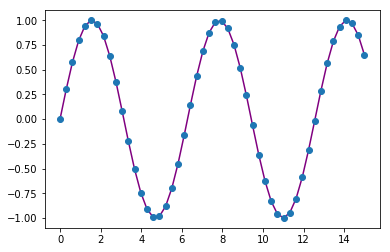

In [185]:
import matplotlib.pyplot as plt
x = np.linspace(0, 15, 50)
y = np.sin(x)
plt.plot(x, y, 'purple') # line
plt.plot(x, y, 'o')      # dots
plt.show()

##### Преимущество по скорости

In [101]:
a = list(range(10000))
b = list(range(10000))

In [102]:
%%timeit
c = [
    x * y
    for x, y in zip(a, b)
]

630 µs ± 8.32 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [103]:
a = np.array(a)
b = np.array(b)

In [104]:
%%timeit
c = a * b

8.73 µs ± 53.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [105]:
%%timeit
c = [
    x * y
    for x, y in zip(a, b)
]

2.57 ms ± 33.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Операции с массивами в 100 раз быстрее, хотя если мы пробуем использовать обычный питоновский код поверх массивов, то получается существенно медленнее

### Выводы:

Для большей производительности лучше использовать арифметические операции над массивами

##### random

В numpy есть аналог модуля random - numpy.random. Используя типизацию из C, он как и свой аналог генерирует случайные данные.

In [100]:
np.random.rand(2, 3, 4) # равномерное от 0 до 1 распределение в заданном shape

array([[[0.69255245, 0.67013254, 0.4916416 , 0.74264444],
        [0.98180276, 0.24723266, 0.40992195, 0.42554582],
        [0.74520809, 0.0730674 , 0.41290252, 0.22806923]],

       [[0.88459765, 0.64535606, 0.90614973, 0.1020952 ],
        [0.38924571, 0.03056059, 0.29299615, 0.76949044],
        [0.98074012, 0.02644419, 0.82836302, 0.1861475 ]]])

In [101]:
np.random.rand(2, 3, 4).shape

(2, 3, 4)

In [102]:
np.random.randn(2, 3, 4) # нормальное распределение в заданном shape

array([[[-0.80911812, -0.4329724 ,  1.25058777, -0.24265171],
        [ 0.08660027, -0.29900456, -1.26918906, -0.16621164],
        [-0.73306372, -0.9887762 , -1.45856065, -1.89164795]],

       [[ 1.20947998, -0.6844489 , -0.82892565,  1.69647088],
        [ 0.74176709,  0.85591201,  0.15803534, -1.04836427],
        [ 1.12257908,  0.75717388,  0.45155154, -1.52756291]]])

In [103]:
np.random.bytes(10) # случайные байты

b'\x0c\xe0]\xb1\xc7L\xee\x8eT\xb1'

Можно генерировать и другие распределения, подробности тут:

https://docs.scipy.org/doc/numpy/reference/random/index.html

##### saving

In [179]:
a = np.array([1,2,3,4])
np.savetxt('new_file.csv', a, header='', footer='')

In [180]:
loaded = np.loadtxt('new_file.csv')
loaded

array([1., 2., 3., 4.])

#### Ещё один пример эффективных вычислений

В заключение приведём ещё один пример, где использование numpy существенно ускоряет код

В математике определена операция перемножения матриц (двухмерных массивов)

$A \times B = C$

$C_{ij} = \sum_k A_{ik} B_{kj}$

сгенерируем случайные матрицы

In [104]:
A = np.random.randint(1000, size=(200, 100))
B = np.random.randint(1000, size=(100, 300))

умножение на основе numpy

In [105]:
def np_multiply():
    return np.dot(A, B)

In [106]:
%timeit np_multiply()

3.4 ms ± 53.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


если хранить матрицу не как двухмерный массив, а как список списков, то будет дольше работать

In [107]:
A = [list(x) for x in A]
B = [list(x) for x in B]

In [108]:
%timeit np_multiply()

9.01 ms ± 27.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


а это умножение на чистом питоновском коде

In [109]:
def python_multiply():
    res = []
    for i in range(200):
        row = []
        for j in range(300):
            val = 0
            for k in range(100):
                val += A[i][k] * B[k][j]
            row.append(val)
        res.append(row)
    return res

In [110]:
%timeit python_multiply()

1.58 s ± 30.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Ускорение более чем в 100 раз